<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/DogVsCatClassification_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
#configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog Vs Cat Dataset

In [3]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!ls

dogs-vs-cats.zip  image_resized1  sample_data		test1.zip  train.zip
image_resized	  kaggle.json	  sampleSubmission.csv	train


In [5]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is Extracted')

The dataset is Extracted


In [6]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset='/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is Extracted')

The dataset is Extracted


In [7]:
import os
#counting the number of files in train folder
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print(file_count)

25000


Printing the name of images

In [8]:
file_names=os.listdir('/content/train')
print(file_names)

['dog.11840.jpg', 'dog.5331.jpg', 'cat.7626.jpg', 'dog.11594.jpg', 'cat.4145.jpg', 'dog.11611.jpg', 'cat.7531.jpg', 'cat.3806.jpg', 'dog.4724.jpg', 'dog.5656.jpg', 'dog.10621.jpg', 'dog.10158.jpg', 'cat.11005.jpg', 'dog.11155.jpg', 'dog.10890.jpg', 'cat.11418.jpg', 'dog.447.jpg', 'cat.7475.jpg', 'cat.11341.jpg', 'dog.4734.jpg', 'cat.9083.jpg', 'cat.4888.jpg', 'cat.8532.jpg', 'dog.1184.jpg', 'dog.11481.jpg', 'dog.9983.jpg', 'dog.6002.jpg', 'dog.8571.jpg', 'cat.6434.jpg', 'dog.4904.jpg', 'dog.4406.jpg', 'cat.7269.jpg', 'cat.4933.jpg', 'cat.10275.jpg', 'dog.7224.jpg', 'dog.9831.jpg', 'dog.3383.jpg', 'cat.10817.jpg', 'cat.2735.jpg', 'dog.10849.jpg', 'dog.863.jpg', 'dog.9786.jpg', 'dog.8789.jpg', 'dog.11334.jpg', 'cat.4546.jpg', 'dog.3601.jpg', 'dog.7050.jpg', 'cat.9127.jpg', 'cat.11139.jpg', 'cat.409.jpg', 'dog.7496.jpg', 'dog.5272.jpg', 'dog.5443.jpg', 'dog.11270.jpg', 'dog.3119.jpg', 'dog.2981.jpg', 'cat.150.jpg', 'cat.10431.jpg', 'dog.8844.jpg', 'cat.9612.jpg', 'cat.10446.jpg', 'cat.590

Importing the Dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of Dog and Cat

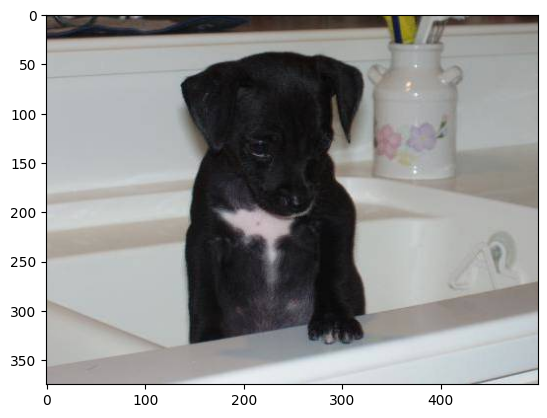

In [10]:
img=mpimg.imread('/content/train/dog.8298.jpg')
imgplot=plt.imshow(img)
plt.show()

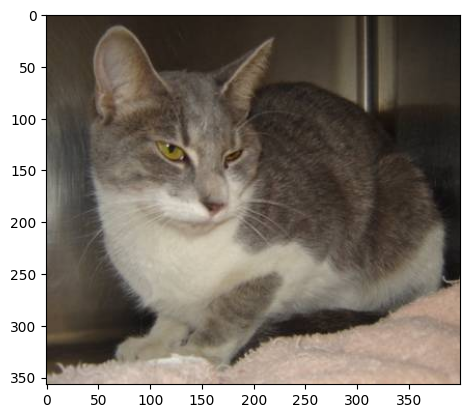

In [11]:
img=mpimg.imread('/content/train/cat.4352.jpg')
imgplot=plt.imshow(img)
plt.show()

In [12]:
file_names=os.listdir('/content/train')
for i in range(5):
  name=file_names[i]
  print(name[0:3])

dog
dog
cat
dog
cat


In [13]:
file_names=os.listdir('/content/train')
dog_count=0;
cat_count=0;
for img_file in file_names:
  name=img_file[0:3]
  if(name=='dog'):
    dog_count+=1
  else:
    cat_count+=1
print('Number of dog images:',dog_count)
print('Number of cat images:',cat_count)

Number of dog images: 12500
Number of cat images: 12500


Resizing all the images

In [24]:
#creating a directory for resized images
os.mkdir('/content/image_resized4')

In [25]:
original_folder='/content/train/'
resized_folder='/content/image_resized4/'

for i in range(2000):
  file_name=os.listdir(original_folder)[i]
  img_path=original_folder+file_name
  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')
  newImgPath=resized_folder+file_name
  img.save(newImgPath)

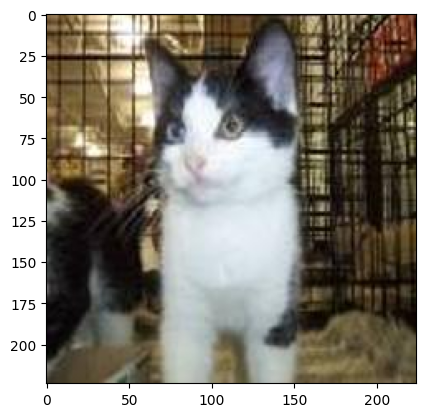

In [27]:
#display resized dog images
img=mpimg.imread('/content/image_resized4/cat.1000.jpg')
imgplot=plt.imshow(img)
plt.show()

Creating Labels for Resized images of dogs and cats

In [40]:
# Cat --> 0
# Dog --> 1
#creating a for loop to assign labels
filenames=os.listdir('/content/image_resized4/')
labels=[]
for i in range(1852):
  file_name=filenames[i]
  label=file_name[0:3]
  if(label=='dog'):
    labels.append(1)
  else:
    labels.append(0)

In [41]:
print(filenames[0:5])
print(len(filenames))

['dog.11840.jpg', 'dog.5331.jpg', 'cat.7626.jpg', 'dog.11594.jpg', 'cat.4145.jpg']
2000


In [42]:
print(labels[0:5])
print(len(filenames))

[1, 1, 0, 1, 0]
2000


In [43]:
#counting the images of dogs and cats
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[951 901]


Converting all resized images to numpy arrays

In [44]:
import cv2
import glob

In [45]:
image_directory='/content/image_resized2/'
image_extension=['png','jpg']
files=[]
[files.extend(glob.glob(image_directory+'*.'+e)) for e in image_extension]

dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [46]:
print(dog_cat_images)

[[[[206 201 203]
   [194 189 191]
   [195 190 192]
   ...
   [133 222 233]
   [134 224 235]
   [132 222 233]]

  [[209 204 206]
   [197 192 194]
   [197 192 194]
   ...
   [134 223 233]
   [138 227 238]
   [139 228 238]]

  [[214 209 211]
   [200 195 197]
   [198 193 195]
   ...
   [142 230 237]
   [148 235 245]
   [154 242 249]]

  ...

  [[164 145 148]
   [171 152 155]
   [178 159 162]
   ...
   [165 149 160]
   [168 152 163]
   [161 145 156]]

  [[164 145 148]
   [170 151 154]
   [177 158 161]
   ...
   [164 148 159]
   [166 150 161]
   [164 148 159]]

  [[163 144 147]
   [168 149 152]
   [174 155 158]
   ...
   [161 145 156]
   [165 149 160]
   [168 152 163]]]


 [[[129 152  98]
   [129 152  98]
   [129 152  98]
   ...
   [169 192 137]
   [169 192 137]
   [159 182 127]]

  [[128 151  97]
   [129 152  98]
   [130 153  99]
   ...
   [166 189 134]
   [169 192 137]
   [163 186 131]]

  [[127 150  96]
   [130 153  99]
   [131 154 100]
   ...
   [163 186 131]
   [170 193 138]
   [169 192

In [47]:
type(dog_cat_images)

numpy.ndarray

In [48]:
print(len(dog_cat_images))

1852


In [49]:

print(dog_cat_images.shape)

(1852, 224, 224, 3)


In [50]:
X=dog_cat_images
Y=np.asarray(labels)

Train Test Split

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [52]:
print(X.shape,X_train.shape,X_test.shape)

(1852, 224, 224, 3) (1481, 224, 224, 3) (371, 224, 224, 3)


In [53]:
#scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [54]:
print(X_train_scaled)
print(X_test_scaled)

[[[[0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  [[0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  [[0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]]

  [[0.99607843 0.99607843 0.99607843]
   [0.9

Building the neural Network

In [55]:
import tensorflow as tf
import tensorflow_hub as hub

In [56]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [57]:
num_of_classes=2

model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [58]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [61]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
47/47 [==============================] - 41s 873ms/step - loss: 0.6678 - acc: 0.5942
Epoch 2/5
47/47 [==============================] - 40s 858ms/step - loss: 0.6387 - acc: 0.6455
Epoch 3/5
47/47 [==============================] - 51s 1s/step - loss: 0.6275 - acc: 0.6543
Epoch 4/5
47/47 [==============================] - 40s 843ms/step - loss: 0.5933 - acc: 0.6914
Epoch 5/5
47/47 [==============================] - 40s 838ms/step - loss: 0.5804 - acc: 0.6907


In [62]:
score,acc=model.evaluate(X_test_scaled,Y_test)
print('Test Loss=',score)
print('Test Accuracy=',acc)

12/12 [==============================] - 12s 995ms/step - loss: 0.8791 - acc: 0.4582
Test Loss= 0.8790869116783142
Test Accuracy= 0.4582210183143616


Predictive system

Path of the image to be predicted: /content/cat.jpg


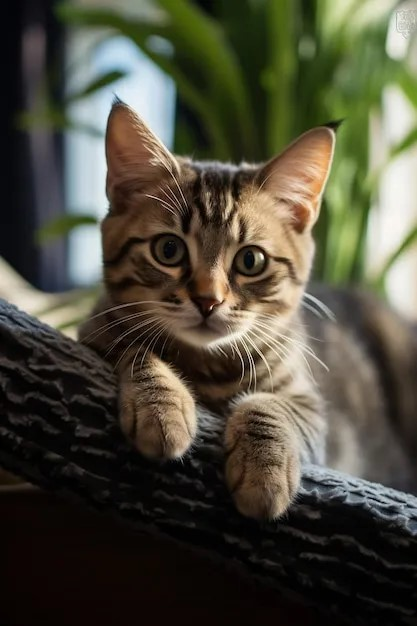

1/1 [==============================] - 0s 110ms/step
0
The Image is of a Cat


In [67]:
import cv2
import numpy as np

# Input path for the image
input_image_path = input('Path of the image to be predicted: ')

# Read the image
input_image = cv2.imread(input_image_path)

# Check if the image was successfully loaded
if input_image is None:
    print("Error: Image not found or unable to read. Please check the path and try again.")
else:
    # Display the image
    from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying in Colab
    cv2_imshow(input_image)

    # Resize the image
    input_image_resize = cv2.resize(input_image, (224, 224))

    # Normalize the image
    input_image_scaled = input_image_resize / 255.0

    # Reshape the image
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

    # Predict the class
    input_prediction = model.predict(image_reshaped)

    # Get the label with the highest probability
    input_pred_label = np.argmax(input_prediction)

    print(input_pred_label)

    # Print the result based on the predicted label
    if input_pred_label == 1:
        print('The Image is of a Dog')
    else:
        print('The Image is of a Cat')


Path of the image to be predicted: /content/dog.jpg


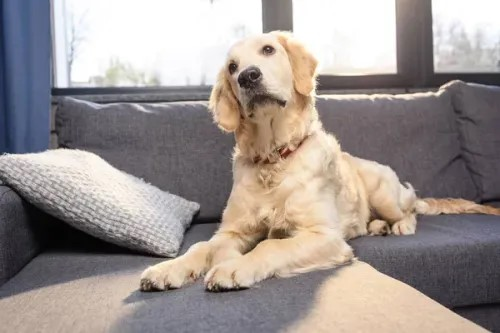

1/1 [==============================] - 0s 35ms/step
0
The Image is of a Cat


In [68]:
import cv2
import numpy as np

# Input path for the image
input_image_path = input('Path of the image to be predicted: ')

# Read the image
input_image = cv2.imread(input_image_path)

# Check if the image was successfully loaded
if input_image is None:
    print("Error: Image not found or unable to read. Please check the path and try again.")
else:
    # Display the image
    from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying in Colab
    cv2_imshow(input_image)

    # Resize the image
    input_image_resize = cv2.resize(input_image, (224, 224))

    # Normalize the image
    input_image_scaled = input_image_resize / 255.0

    # Reshape the image
    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

    # Predict the class
    input_prediction = model.predict(image_reshaped)

    # Get the label with the highest probability
    input_pred_label = np.argmax(input_prediction)

    print(input_pred_label)

    # Print the result based on the predicted label
    if input_pred_label == 1:
        print('The Image is of a Dog')
    else:
        print('The Image is of a Cat')
